# Proyecto Pima Indians Diabetes Database

Este data set proviene del Instituto Nacional de Diabetes y Enfermedades digestivas y Renales, el cual tiene por objetivo predecir de forma diagnóstica si un paciente tiene o no diabetes.
Dentro de las restricciones que se tienen es que todas las pacientes son mujeres de al menos 21 años de herencia indígena pima.
Las variables que hacen parte del data set son:
- Pregnancies: Número de embarazos
- Glucose: Glucosa
- BloodPressure: Presión arterial
- SkinThickness: Grosor de la piel
- Insuline. Insulina
- BMI: Indice de masa corporal
- DiabetesPedigreeFunction: Funcion que califica la probabilidad de diabetes en función de los antecedentes familiares.
- Age: Edad en años
- Outcome: Variable objetivo, 1 Diabético y 0 No diabético.


https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [238]:
# importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Carga de datos

In [7]:
# carga de datos
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# información de cada tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Análisis exploratorio de los datos

En esta sección se explora:
- Datos nulos
- Variables númericas y categóricas
- Principales estadisticas
- Rango de los datos
- Correlación entre las variables

In [9]:
# revisar nulos 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Los datos no tienen nulos

In [10]:
# valores únicos de las variables
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Se asurmirá que una variable es categórica si tiene 6 o menos valores únicos. Para este caso solo la varible objetivo Outcome es categórica. 

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Aunque el conjuto de datos no tiene valores nulos se puede observar que las variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI y Outcome tienen valores en cero, lo cuál solo es válido para la variable objetivo Pregnacies y Outcome.

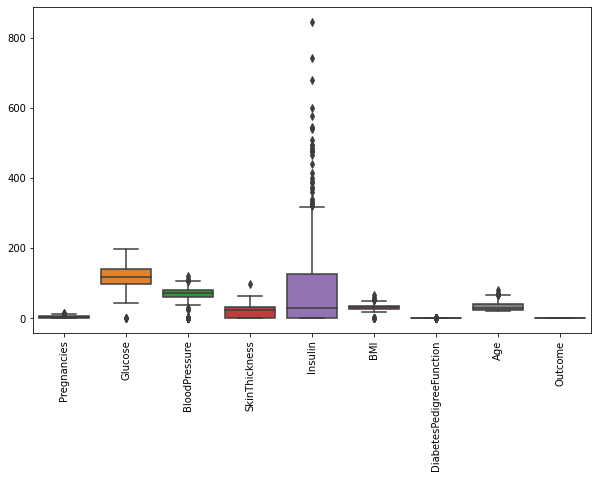

In [12]:
# Rango de los datos

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

- La variable insulina tiene un rango de datos muy amplio, seguido de las variables glucosa y BloddPressure.
- LAs variables tienen diferentes rangos por lo que se deben estandarizar.

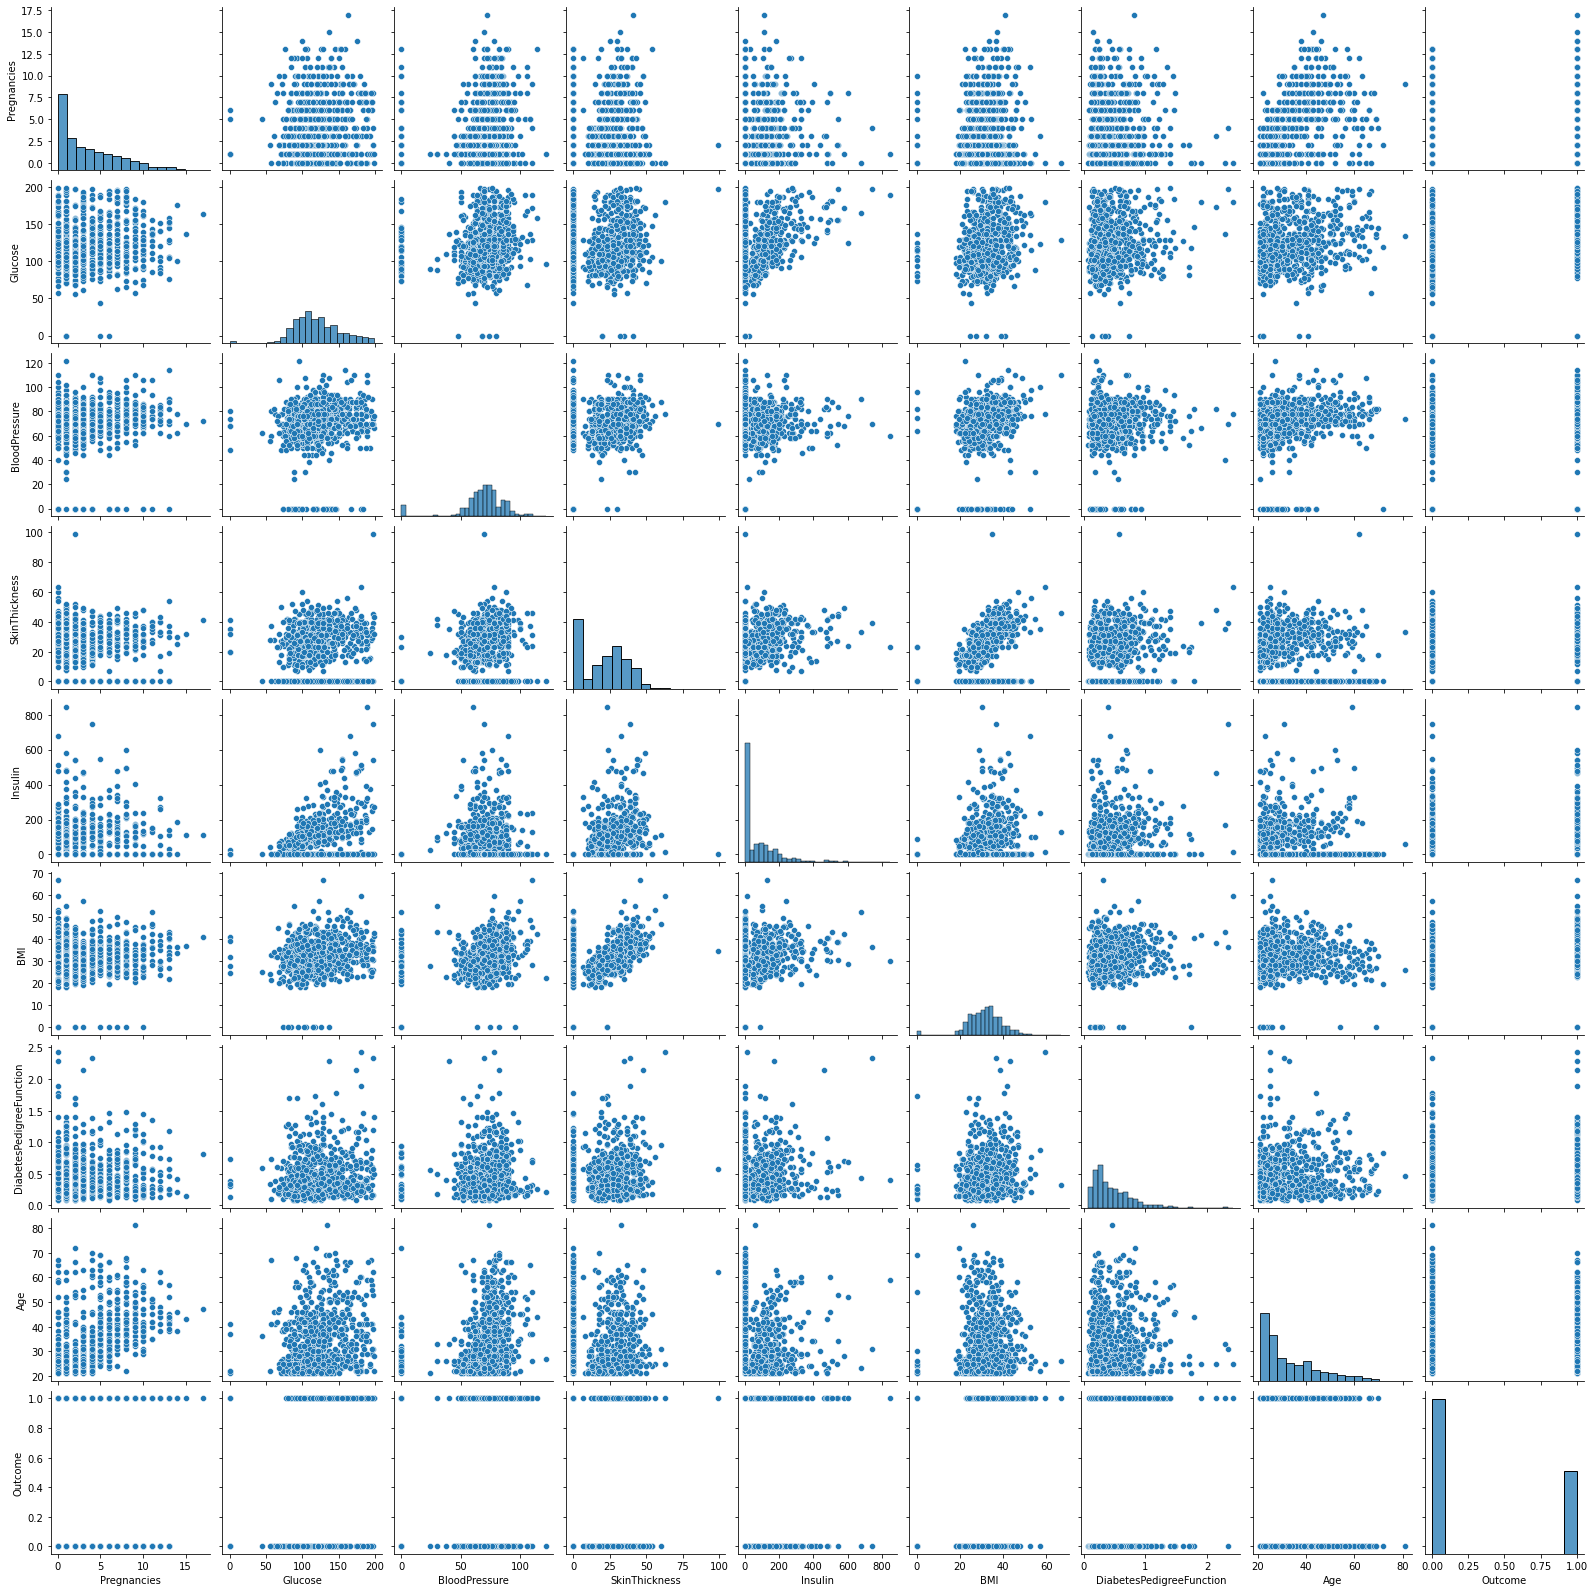

In [13]:
# Relación entre las variables

sns.pairplot(data)

- La relación entre Pregnancies y Age es directamente proporcional, a mayor edad más embarazos.
- La relación entre BMI Y SkinThickness es directamente proporcional, a mayor grosor de la piel mayor indice de masa corporal.
- La relación entre la Glucosa e Insulin es directamente proporcional, a mayores niveles de glucosa mayor nivel de insulina.

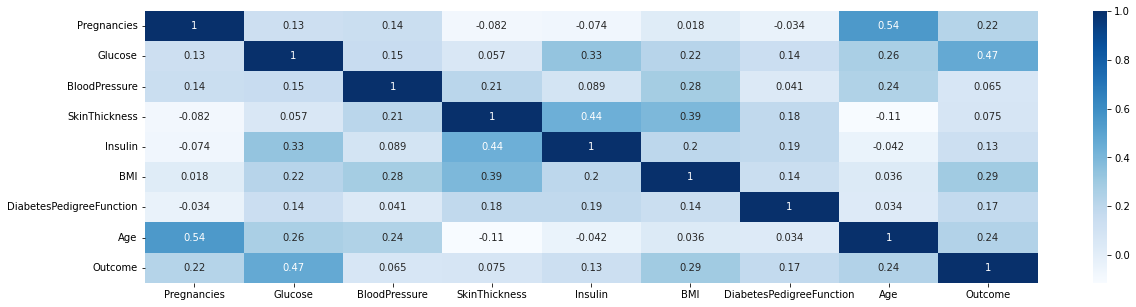

In [14]:
# Matriz de correlación entre las variables

plt.figure(figsize = (20,5))
sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.show()

- Se aprecia también la relación entre la variable Insulin y SkinThincness.
- No se evidencia variables altamente correlacionadas.

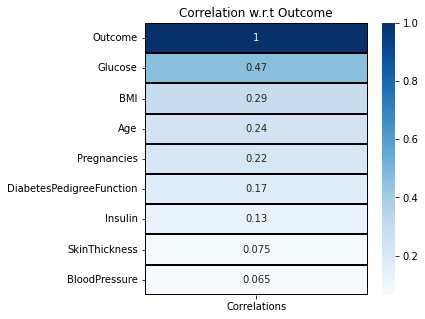

In [15]:
# Correlación con la variable salida

corr = data.corrwith(data['Outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Outcome')
plt.show()

La variable más correlacionada con la variable salida es la Glucosa.

In [16]:
# Se divide el dataset en variables categóricas y numéricas 
variablesCategoricas = []
variablesNumericas = []
for k,i in data.nunique().to_dict().items():
    if i > 6:
        variablesNumericas.append(k)
    else:
        variablesCategoricas.append(k)

print("Las variables categoricas son: ", *variablesCategoricas)
print("Las variables numericas son: ", *variablesNumericas)

Las variables categoricas son:  Outcome
Las variables numericas son:  Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


### Variables numéricas (independientes)

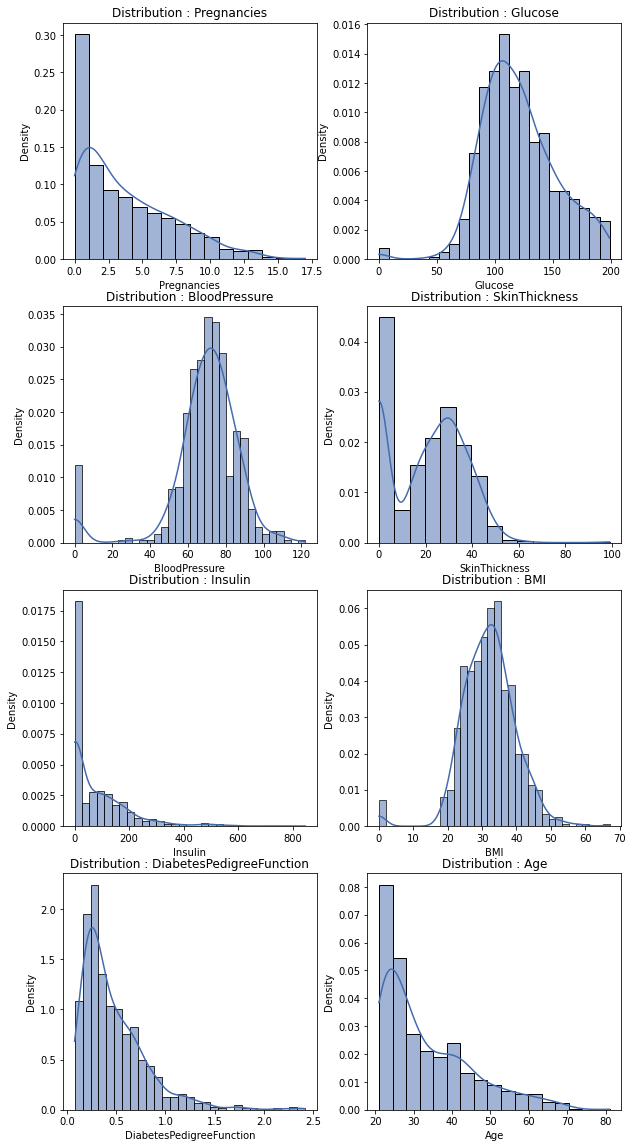

In [90]:
# impresión de la distribución de las variables númericas
colors = ['#446BAD']
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
for i in range(len(variablesNumericas)):
    plt.subplot(4,2,i+1)
    sns.histplot(data[variablesNumericas[i]], stat='density', kde=True, color='#446BAD')
    title = 'Distribution : ' + variablesNumericas[i]
    plt.title(title)
plt.show()

- Glucosa y BMI muestran una distribución normal con un pequeño pico en los ceros.
- BloodPressure y SkinThickness también siguen una distribución normal pero con un pico más grande en los ceros. 
- Pregnacies, Insulin, DiabetesPedigreeFunction y Age muestran una distribución sesgada hacia la derecha.

### Variable categórica (dependiente)

In [17]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

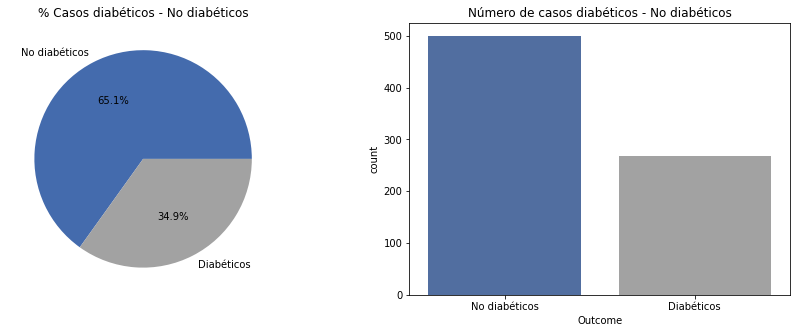

In [18]:
colors = ['#446BAD','#A2A2A2']

fig = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1,2,1)
labels = ['No diabéticos', 'Diabéticos']
colors = sns.color_palette(colors)
plt.pie(data["Outcome"].value_counts(), labels=labels, colors=colors, autopct='%0.1f%%')
plt.title('% Casos diabéticos - No diabéticos')

plt.subplot(1,2,2)
ax = sns.countplot(x=data["Outcome"], palette=colors)
ax.set_xticklabels(labels)
plt.title('Número de casos diabéticos - No diabéticos')
plt.show()

Los datos estan desbalanceados, los no diabéticos tienen casi el doble de casos.

## Preparación de los datos

In [156]:
#
# Se crea una copia y se extrae la columna Outcome que es la variable de salida (columna 8)
#
dataCopy =data.copy()
y = dataCopy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [157]:
#
# Extrae la columna Outcome que es la variable de salida (columna 8)
#
X = dataCopy.iloc[:, :8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Revisión de la varianza de las variables

In [147]:
from sklearn.feature_selection import VarianceThreshold

varianceThreshold = VarianceThreshold(
    threshold=0.8 * (1 - 0.8),
)

varianceThreshold.fit_transform(X)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [148]:
varianceThreshold.variances_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

- En este caso se desea remover las columnas que tengan más del 80% de sus valores iguales. Es decir una varianza inferior a 0.8(1-0.8) = 0.16
- Para este caso ninguna variable tiene una varianza inferior a 0.16 y no se remueve ninguna.

### Reemplazar datos nulos

Según se observó en las principales estadísticas las variables Glucose, BloodPressure, SkinThickness, Insulin, BMI tenian valores en cero.

In [99]:
# se reemplazan los 0 por NA
# diabetes_data_copy = data.copy(deep = True)
# diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# diabetes_data_copy.isnull().sum()

In [100]:
# Se rellenan los NA con el promedio de cada columna 
# las distribuciones normales se reemplazan por la media. (La media se utiliza para distribuciones normales de números, 
# con una cantidad baja de valores atípicos.)

# diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
# diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)

# las distribuciones bimodales se reemplazan por la mediana. (La mediana se utiliza generalmente para devolver la tendencia 
# central en el caso de distribuciones numéricas sesgadas.)

# diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].median(), inplace = True)
# diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
# diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)


In [101]:
# fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
# for i in range(len(variablesNumericas)):
#     plt.subplot(4,2,i+1)
#     sns.histplot(diabetes_data_copy[variablesNumericas[i]], stat='density', kde=True)
#     title = 'Distribution : ' + variablesNumericas[i]
#     plt.title(title)
# plt.show()

- Se comenta el código para dejar el ejemplo de como se haría la imputación de datos pero no lo haremos porque esta práctica no es recomendada.

Las distribución de las datos muestran un cambio después de eliminar los nulos.

### Estandarizando los datos

In [149]:

ss = StandardScaler() # Standardization

X['Pregnancies'] = ss.fit_transform(X[['Pregnancies']])
X['Insulin'] = ss.fit_transform(X[['Insulin']])
X['DiabetesPedigreeFunction'] = ss.fit_transform(X[['DiabetesPedigreeFunction']])
X['Age'] = ss.fit_transform(X[['Age']])
X['BloodPressure'] = ss.fit_transform(X[['BloodPressure']])
X['SkinThickness'] = ss.fit_transform(X[['SkinThickness']])
X['Glucose'] = ss.fit_transform(X[['Glucose']])
X['BMI'] = ss.fit_transform(X[['BMI']])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


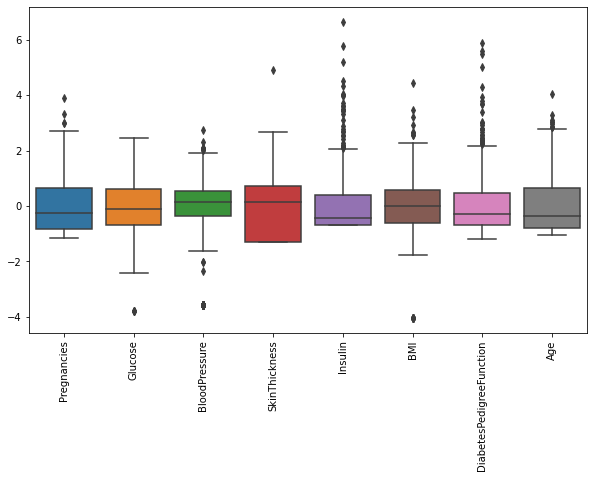

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

### Selección de variables más relevantes

#### SelectKBest

En técnica ordena las variables más relevantes para el modelo

In [204]:
from sklearn.feature_selection import SelectKBest, f_classif

selectKBest = SelectKBest(
    score_func=f_classif,
    k="all",
)

selectKBest.fit(X, y)
X_new = selectKBest.transform(X)

X_new.shape

(768, 8)

In [205]:
selectKBest.scores_

array([ 39.67022739, 213.16175218,   3.2569504 ,   4.30438091,
        13.28110753,  71.7720721 ,  23.8713002 ,  46.14061124])

In [206]:
sorted(tuple(zip(selectKBest.scores_, X.columns)))

[(3.256950397889028, 'BloodPressure'),
 (4.304380905008516, 'SkinThickness'),
 (13.281107531096337, 'Insulin'),
 (23.871300204344593, 'DiabetesPedigreeFunction'),
 (39.670227393616116, 'Pregnancies'),
 (46.140611238735865, 'Age'),
 (71.7720721022405, 'BMI'),
 (213.16175217803828, 'Glucose')]

La variable con puntaje menor puntaje son BloodPressure y SkinThickness.

#### RFECV

La técnica de Eliminación recursiva de características usando cross-validation (RFECV) da una matriz booleana con las variables seleccionadas para el modelo.

In [219]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")

selector = RFECV(
    estimator=estimator,
    step=1,
    cv=5,
    n_jobs=-1,
)

selector.fit(X, y)
X_new = selector.transform(X)

X_new.shape

(768, 7)

In [220]:
tuple(zip(selector.support_, X.columns))

((True, 'Pregnancies'),
 (True, 'Glucose'),
 (True, 'BloodPressure'),
 (True, 'SkinThickness'),
 (False, 'Insulin'),
 (True, 'BMI'),
 (True, 'DiabetesPedigreeFunction'),
 (True, 'Age'))

Debido a que la variable no seleccionada por este metodo (Insulin) es diferente a las variables con menor score en el método SelecKBest no se elimina ninguna variable.

### Balanceando los datos

In [23]:
# se balancean los datos
from imblearn.over_sampling import SMOTE
sm =SMOTE()
X_bal, y_bal = sm.fit_resample(X, y)

In [24]:
y_bal.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

### División de los datos

In [25]:
# datos balanceados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X_bal,
        y_bal,
        test_size=0.2,
        random_state=12345,
    )

In [26]:
# datos desbalanceados
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=12345,
        stratify=y
    )

In [27]:
y_test1.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

## Modelo

In [221]:
def get_metrics(clf, X_train, y_train, X_test, y_test):
    """Esta función calcula metricas y graficas para
    mostrar el desempeño del modelo, ademas retorna un diccionario
    con las metricas mas importantes
    """
    print()
    print("********************************************************************")
    print("******************  METRICAS EN DATASET DE TRAIN     ***************")
    print("********************************************************************")
    print()
    y_pred_train = clf.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train, normalize="true").round(2)
    
    print(classification_report(y_train,y_pred_train)) 
    plt.figure(figsize=(4,3))
    sns.heatmap(cm_train, annot = True, cmap=plt.cm.Blues,fmt='g')
    plt.title("Matriz de confusion dataset train")
    plt.show()
                                                       
    
    print()
    print("********************************************************************")
    print("******************  METRICAS EN DATASET DE TEST     ****************")
    print("********************************************************************")
    print()
    y_pred_test = clf.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test, normalize="true").round(2)
    
    print(classification_report(y_test,y_pred_test))      
    plt.figure(figsize=(4,3))
    sns.heatmap(cm_test, annot = True, cmap=plt.cm.Blues,fmt='g')
    plt.title("Matriz de confusion dataset test")
    plt.show()

### Regresión logística

In [107]:
# Modelo para los datos con clases balanceadas

model = LogisticRegressionCV(random_state=123, solver="lbfgs", multi_class="ovr")

In [131]:
# Modelo para los datos con clases no balanceadas
# El modelo LogisticRegressionCV trae el parametro cv que significa validación cruzada y hace uso de 
# StratifiedKFold ideal para clases desbalanceadas porque conserva de la muestra el porcentaje de cada clase.

model1 = LogisticRegressionCV(random_state=123, solver="lbfgs", multi_class="ovr")

param_grid = {
    "cv": np.arange(1, 30),
}

gridSearchCV1 = GridSearchCV(model1, param_grid)


#### Datos con clases balanceadas

In [109]:
# Entrenamiento del pipeline con los datos de entrenamiento.

model.fit(X_train, y_train)

LogisticRegressionCV(multi_class='ovr', random_state=123)


********************************************************************
******************  METRICAS EN DATASET DE TRAIN     ***************
********************************************************************

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       406
           1       0.77      0.74      0.75       394

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



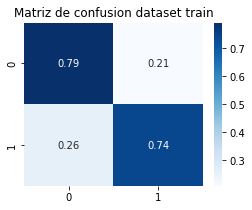


********************************************************************
******************  METRICAS EN DATASET DE TEST     ****************
********************************************************************

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        94
           1       0.79      0.72      0.75       106

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



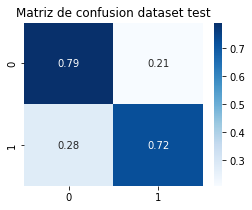

In [110]:
metricas_datos_balanceados = get_metrics(model, X_train, y_train, X_test, y_test)

- De la matriz de confusión se observa que los porcentajes de clasificación para cada clase se mantienen en los datos de train y test.
- Para los datos de test el modelo presenta más problemas clasificando los falsos negativos en un 28%.
- Debido al aumento de los datos la precisión no es adecuada para evaluar el modelo.

#### Datos sin balancear las clases

In [132]:
# Entrene el pipeline con los datos de entrenamiento.
# Datos desbalanceados
gridSearchCV1.fit(X_train1, y_train1)

c:\Users\brend\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 145.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\brend\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\brend\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1750, in fit
    cv = check_cv(self.cv, y, classifier=True)
  File "c:\Users\brend\AppData\Local\Programs\Python\Python39\lib\site-p

GridSearchCV(estimator=LogisticRegressionCV(multi_class='ovr',
                                            random_state=123),
             param_grid={'cv': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})


********************************************************************
******************  METRICAS EN DATASET DE TRAIN     ***************
********************************************************************

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       400
           1       0.74      0.53      0.62       214

    accuracy                           0.77       614
   macro avg       0.76      0.71      0.73       614
weighted avg       0.77      0.77      0.76       614



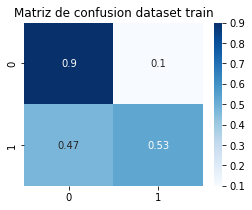


********************************************************************
******************  METRICAS EN DATASET DE TEST     ****************
********************************************************************

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



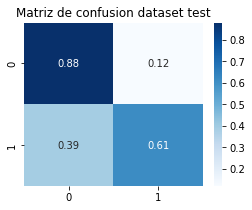

In [130]:
metricas_datos_desbalanceados = get_metrics(gridSearchCV1, X_train1, y_train1, X_test1, y_test1)

- Para los datos de test hay una disminución en los falsos negativos pues pasó del 47% en train al 39% en test.
- El modelo también presenta problemas con los falsos negativos.

### Máquinas de vectores de soporte

In [244]:
clf = SVC(kernel="rbf", random_state=1234)

#### Datos con clases balanceadas

In [245]:
clf.fit(X_train, y_train)

SVC(random_state=1234)


********************************************************************
******************  METRICAS EN DATASET DE TRAIN     ***************
********************************************************************

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       406
           1       0.81      0.84      0.83       394

    accuracy                           0.82       800
   macro avg       0.83      0.83      0.82       800
weighted avg       0.83      0.82      0.82       800



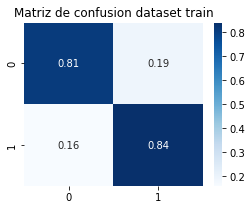


********************************************************************
******************  METRICAS EN DATASET DE TEST     ****************
********************************************************************

              precision    recall  f1-score   support

           0       0.81      0.69      0.75        94
           1       0.76      0.86      0.81       106

    accuracy                           0.78       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.78      0.78      0.78       200



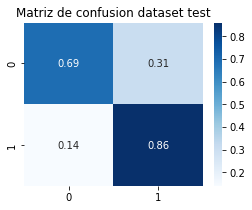

In [246]:
metricas_datos_balanceados = get_metrics(clf, X_train, y_train, X_test, y_test)

- El porcentaje de clasificación en las máquinas de vectores mejora respecto a la regresión logistica.
- En los datos de test, aumentan los falsos positivos. 

#### Datos con clases no balanceadas

In [247]:
clf.fit(X_train1, y_train1)

SVC(random_state=1234)


********************************************************************
******************  METRICAS EN DATASET DE TRAIN     ***************
********************************************************************

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       400
           1       0.81      0.64      0.71       214

    accuracy                           0.82       614
   macro avg       0.82      0.78      0.79       614
weighted avg       0.82      0.82      0.82       614



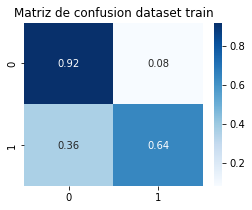


********************************************************************
******************  METRICAS EN DATASET DE TEST     ****************
********************************************************************

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.73      0.67      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



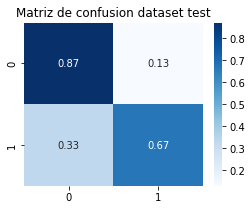

In [248]:
metricas_datos_balanceados = get_metrics(clf, X_train1, y_train1, X_test1, y_test1)

- El modelo máquinas de vectores de soportes mejora la clasificación.
- Los falsos negativos disminuyeron en un 3% repecto al modelo de regresión logística.

## Conclusión

- Agregar datos para balancear las clases no generó un mejor modelo.
- En las clases desbalanceadas del modelo de regresión logística y máquinas de vectores de soportes hay problemas con los falsos negativos, sin embargo estás últimos hicieron una mejor clasificación.
- El kernel rbf en las máquinas de vectores de soporte hizo una mejor clasificación que el kernel lineal.


## Créditos

- https://www.kaggle.com/code/tanmay111999/diabetes-classification-xgb-lgbm-stack-smote#Conclusion
- https://www.kaggle.com/code/amrelsaee258/ann-diabetes-classification
- https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/1-06_particioinamiento_con_clases_mal_balanceadas.html